<a href="https://colab.research.google.com/github/nishaarokiyasamy2058-star/Emotion-Aware-Study-Assistant/blob/main/Emotion_Aware_Study_Assistant_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Kaggle

In [34]:
!pip install kaggle


Create kaggle.json MANUALLY

In [35]:
import os, json

kaggle_json = {
    "username": "NISHANTHINI A",
    "key": "KGAT_5819567329f9743c5ce06951a89f08f4"
}

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_json, f)

os.chmod("/root/.kaggle/kaggle.json", 0o600)

print("kaggle.json created successfully")


kaggle.json created successfully


VERIFY FILE EXISTS

In [36]:
!ls /root/.kaggle


kaggle.json


TEST KAGGLE

In [37]:
!kaggle datasets list


ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                          Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        268  1.0              
suvidyasonawane/student-academic-placement-performance-dataset    Student Academic Placement Performance Dataset           94469  2026-01-11 02:02:47.837000              0         24  1.0              
neurocipher/student-performance                                   Student Performance                                      49705  2025-12-12 12:06:28.973000           1261        155  1.0     

Download Your Emotion Dataset





In [38]:
# Download the dataset from Kaggle (force download to avoid "already exists" issue)
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp --force

# Unzip automatically, overwrite all files without prompts
!unzip -o emotions-dataset-for-nlp.zip

# List files to verify
!ls


Dataset URL: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp
License(s): CC-BY-SA-4.0
  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 1.18GB/s]
Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 
emotion_model.pkl	      sample_data  tfidf_vectorizer.pkl  val.txt
emotions-dataset-for-nlp.zip  test.txt	   train.txt


Load the Emotion Dataset Files

In [39]:
import pandas as pd

def load_data(file_path):
    texts = []
    labels = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            text, label = line.strip().split(';')
            texts.append(text)
            labels.append(label)
    return pd.DataFrame({'text': texts, 'emotion': labels})

train_df = load_data("train.txt")
test_df  = load_data("test.txt")
val_df   = load_data("val.txt")

print(train_df.head())


                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


Combine Train + Validation

In [40]:
data = pd.concat([train_df, val_df], ignore_index=True)

X = data['text']
y = data['emotion']


Text Vectorization (TF-IDF)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)


Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42
)


Train Emotion Classification Model

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6941666666666667
              precision    recall  f1-score   support

       anger       0.92      0.43      0.58       462
        fear       0.85      0.27      0.41       415
         joy       0.62      0.98      0.76      1176
        love       1.00      0.09      0.17       318
     sadness       0.73      0.92      0.82      1092
    surprise       1.00      0.02      0.04       137

    accuracy                           0.69      3600
   macro avg       0.85      0.45      0.46      3600
weighted avg       0.77      0.69      0.63      3600



Create Emotion-Aware Study Assistant

In [44]:
def emotion_study_assistant(user_text):
    emotion = model.predict(vectorizer.transform([user_text]))[0]

    recommendations = {
        "joy": "You’re in a great mood! Try learning a new or difficult topic.",
        "sadness": "Take a short break, then revise easy topics.",
        "anger": "Relax with deep breathing before studying.",
        "fear": "Start with basics to build confidence.",
        "love": "Use your positive energy for focused study.",
        "surprise": "Revise something familiar to stay balanced."
    }

    return emotion, recommendations.get(emotion, "Stay calm and focused.")

# Test
emotion, advice = emotion_study_assistant("I am feeling very stressed about my exams")
print("Detected Emotion:", emotion)
print("Study Advice:", advice)


Detected Emotion: joy
Study Advice: You’re in a great mood! Try learning a new or difficult topic.


Model Evaluation (Small Enhancement)

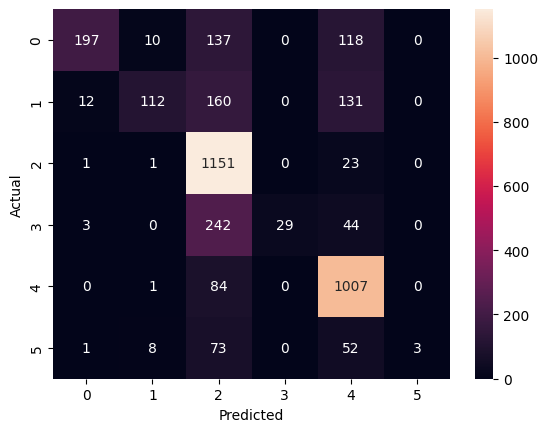

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Save the Model (Professional Touch)

In [46]:
import pickle

pickle.dump(model, open("emotion_model.pkl", "wb"))
pickle.dump(vectorizer, open("tfidf_vectorizer.pkl", "wb"))
